# Loan Lanction Amount

**Business Problem**
***
To sanction the specific home loan amount to customers those have applied based on age, income, professional qualification, any credit history & repayment history, etc.

**Data Science Problem**
***
To predict the loan amount that can be sanctioned to customers who have applied for home loan

**Business Metric**
***
Loan amount sanctioned should not exceed 80% of the property value 

**Evaluation Metric**
***
The evaluation metric for this task is `R2 Score`. Read up about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In C:\Users\Monika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Monika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Monika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Monika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Monika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [3]:
import os
from os.path import dirname, abspath
root = dirname(abspath('.'))
data_dir = os.path.join(root, 'Cipla','data')
train_dir = os.path.join(data_dir,'train.csv')

In [4]:
train = pd.read_csv(train_dir)
pd.set_option('max_columns', None)
train

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,722.34,Y,Y,2.0,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,253.04,N,N,3.0,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,583.11,N,Y,NaN,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,378.29,N,Y,3.0,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


**Observation :**<br>
Income (USD) & Property age column have similar values

## Basic Data Check

In [5]:
# Train Data
train.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091407e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [6]:
#Train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [7]:
#Null values of train data in percentage
100*train.isnull().sum()/len(train)

Customer ID                     0.000000
Name                            0.000000
Gender                          0.176667
Age                             0.000000
Income (USD)                   15.253333
Income Stability                5.610000
Profession                      0.000000
Type of Employment             24.233333
Location                        0.000000
Loan Amount Request (USD)       0.000000
Current Loan Expenses (USD)     0.573333
Expense Type 1                  0.000000
Expense Type 2                  0.000000
Dependents                      8.310000
Credit Score                    5.676667
No. of Defaults                 0.000000
Has Active Credit Card          5.220000
Property ID                     0.000000
Property Age                   16.166667
Property Type                   0.000000
Property Location               1.186667
Co-Applicant                    0.000000
Property Price                  0.000000
Loan Sanction Amount (USD)      1.133333
dtype: float64

**Insights** : There are 11 columns having null values we need to impute the the numerical values by mean & median strategy whereas categorical columns by most frequent strategy

<AxesSubplot:>

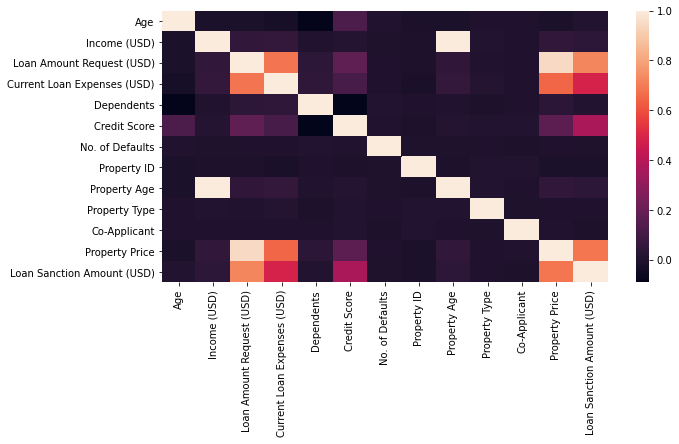

In [8]:
# Data Correlation
plt.figure(figsize=(10,5))
sns.heatmap(train.corr())

## Data Cleaning

In [9]:
train[['Income (USD)', 'Current Loan Expenses (USD)', 
       'Credit Score', 'Property Age', 
       'Loan Sanction Amount (USD)']] = train[['Income (USD)', 'Current Loan Expenses (USD)', 
                                               'Credit Score', 'Property Age', 'Loan Sanction Amount (USD)']].fillna(train[['Income (USD)', 
                                            'Current Loan Expenses (USD)', 'Credit Score', 'Property Age', 'Loan Sanction Amount (USD)']].mean())


In [10]:
train[['Dependents']] = train[['Dependents']].fillna(train[['Dependents']].median())

In [11]:
train.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                      0
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                      0
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)        0
dtype: int64

In [12]:
categorical_train = train[['Gender', 'Income Stability', 'Type of Employment','Has Active Credit Card', 'Property Location']]

In [13]:
# Imputing Categorical column
from sklearn.impute import SimpleImputer

S_imp = SimpleImputer(strategy = 'most_frequent')
final_cat = S_imp.fit_transform(categorical_train)
type(final_cat)

numpy.ndarray

In [14]:
#Converting into dtype DataFrame
cat_col = pd.DataFrame(final_cat, columns = ['Gender', 'Income Stability', 'Type of Employment','Has Active Credit Card', 'Property Location'])
cat_col.isnull().sum()

Gender                    0
Income Stability          0
Type of Employment        0
Has Active Credit Card    0
Property Location         0
dtype: int64

In [15]:
#Dropping old columns
train.drop(labels = ['Gender', 'Income Stability', 'Type of Employment','Has Active Credit Card', 'Property Location'], axis = 'columns')

#Replacing new values to train data
train[['Gender', 'Income Stability', 'Type of Employment',
        'Has Active Credit Card', 'Property Location']] = cat_col[['Gender', 'Income Stability', 'Type of Employment',
                                                                   'Has Active Credit Card', 'Property Location']]
train = round(train, 2)
train.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

# Exploratory Data Analysis

In [16]:
#Copying train data
train_copy = train.copy()

In [17]:
# Converting age into age groups
def age_convert(age):
    result = ''
    if(age <= 21):
        result = '18-21'
    elif(age <= 25):
        result = '22-25'
    elif(age <=29):
        result = '26-29'
    elif(age <= 33):
        result = '30-33'
    elif(age <= 37):
        result = '34-37'
    elif(age <= 41):
        result = '38-41'
    elif(age <= 45):
        result = '42-45'
    elif(age <=49):
        result = '46-49'
    elif(age <= 53):
        result = '50-53'
    elif(age <= 57):
        result = '54-57'
    elif(age <= 61):
        result = '58-61'
    elif(age <= 65):
        result = '62-65'
    else:
        result = 'Senior'
    return result

train_copy['Age Group'] = train_copy['Age'].map(lambda x: age_convert(x))

In [ ]:
#Def function for income of particular age group
def mean_income(age_group):
    sub = train_copy[train_copy['Age Group'] == age_group]
    return round(sub['Income (USD)'].mean(),2)

In [ ]:
#Create column for mean income for age group
train_copy['Mean Income'] = train_copy['Age Group'].map(lambda x : mean_income(x))

### Income VS Age

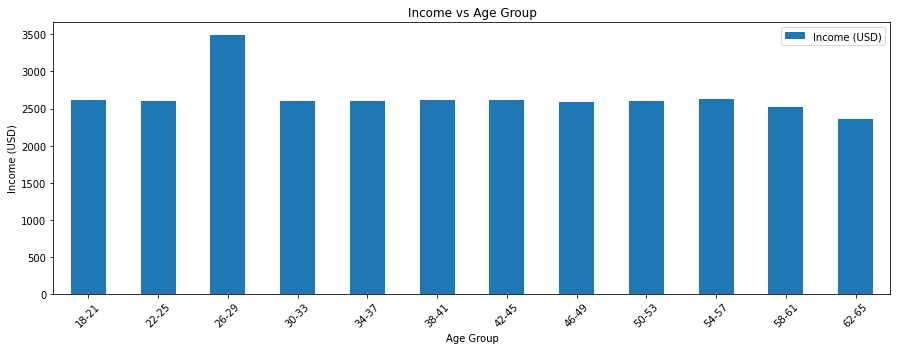

In [18]:
ax = round(train_copy.groupby(['Age Group'])[['Income (USD)']].mean().sort_index(), 2)
ax.plot(kind = 'bar', figsize = (15,5))
plt.xticks(rotation =45)
plt.ylabel('Income (USD)')
plt.title('Income vs Age Group')
plt.show()

**Insights :** <br>
All the age group have almost same income around $2500 except agegroup 26-29

## Income Vs Profession

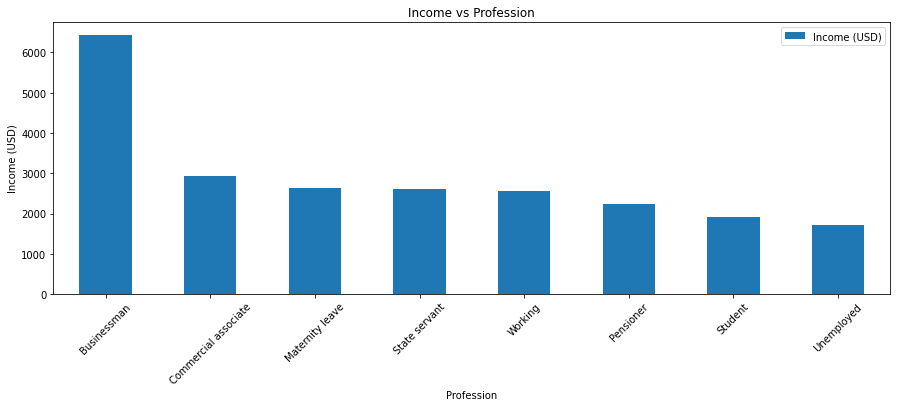

In [19]:
ax = round(train_copy.groupby(['Profession'])[['Income (USD)']].mean().sort_values('Income (USD)',ascending = False), 2)
ax.plot(kind = 'bar', figsize = (15,5))
plt.xticks(rotation =45)
plt.ylabel('Income (USD)')
plt.title('Income vs Profession') 
plt.show()

### Income vs Type of Employment

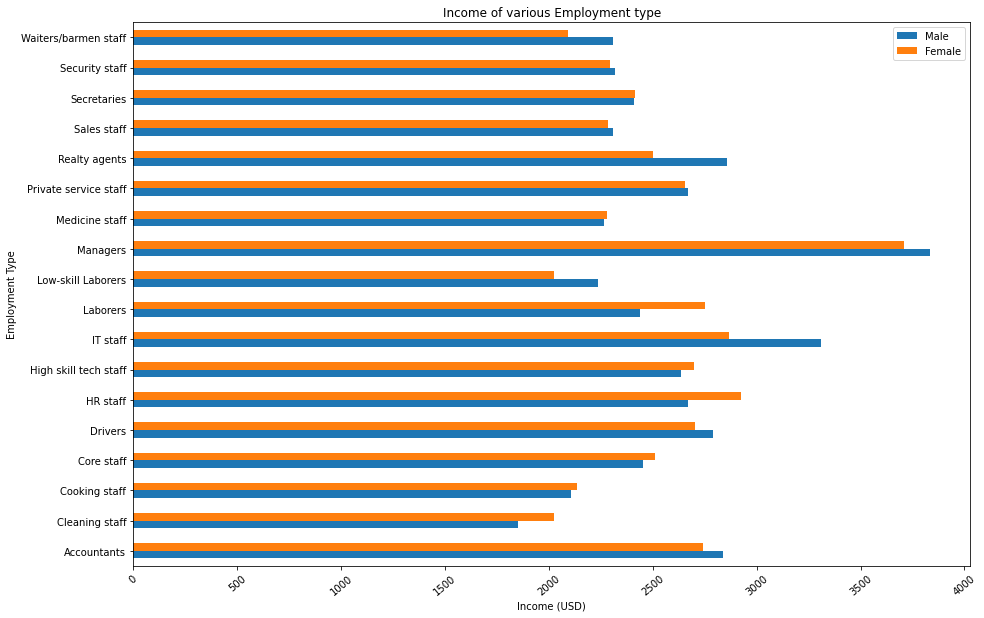

In [20]:
ax = round(train_copy.groupby(['Type of Employment', 'Gender'])[['Income (USD)']].mean().unstack(), 2)
ax.plot(kind = 'barh', figsize = (15,10))
plt.xticks(rotation =40)
plt.ylabel('Employment Type')
plt.xlabel('Income (USD)')
plt.title('Income of various Employment type')
plt.legend(labels = ['Male','Female'])
plt.show()

### Counts of employment type

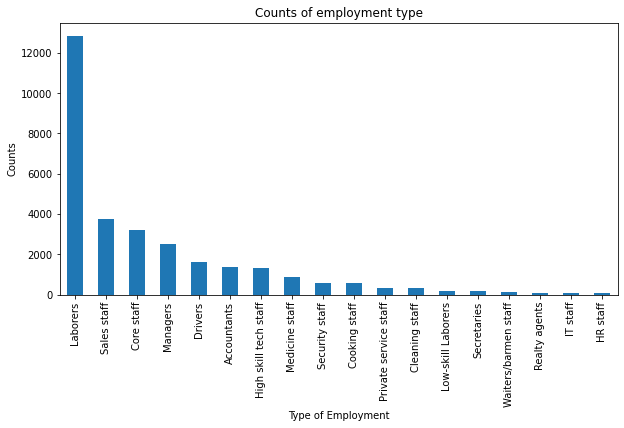

In [21]:
ax = train_copy['Type of Employment'].value_counts()
ax.plot(kind= 'bar', figsize = (10,5))
plt.title('Counts of employment type')
plt.xlabel('Type of Employment')
plt.ylabel('Counts')
plt.show()

### Income Stability of different age groups

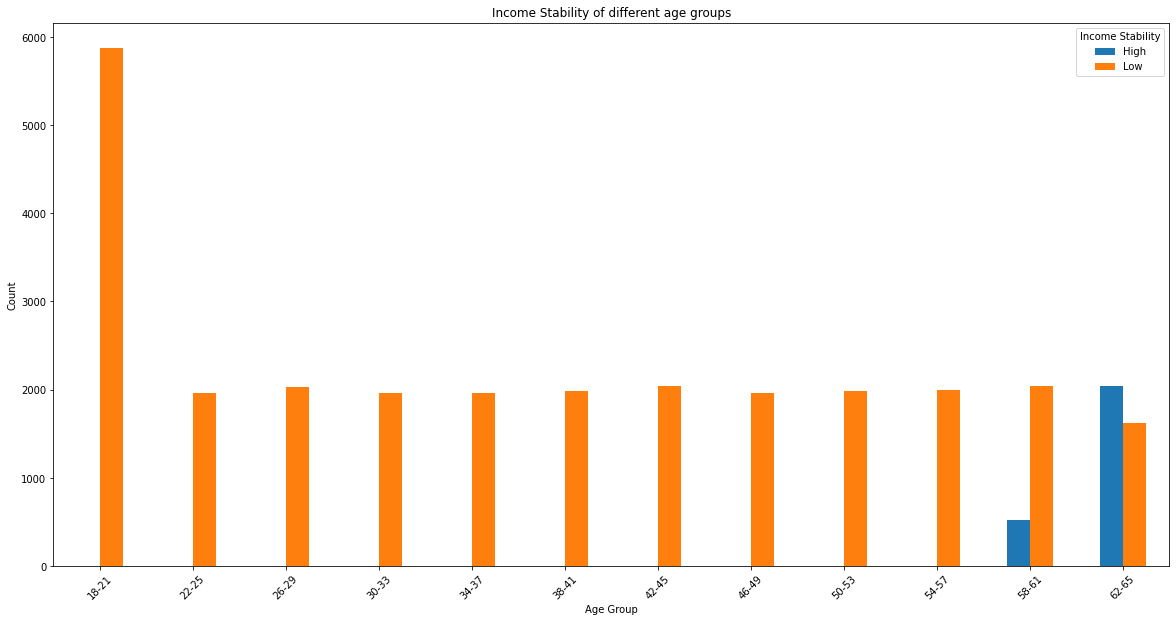

In [22]:
ax = train_copy.groupby('Age Group')['Income Stability'].value_counts().unstack()
ax.plot(kind = 'bar', figsize = (20,10))
plt.xticks(rotation =45)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Income Stability of different age groups')
plt.show()

### Income Stability of different Employment type

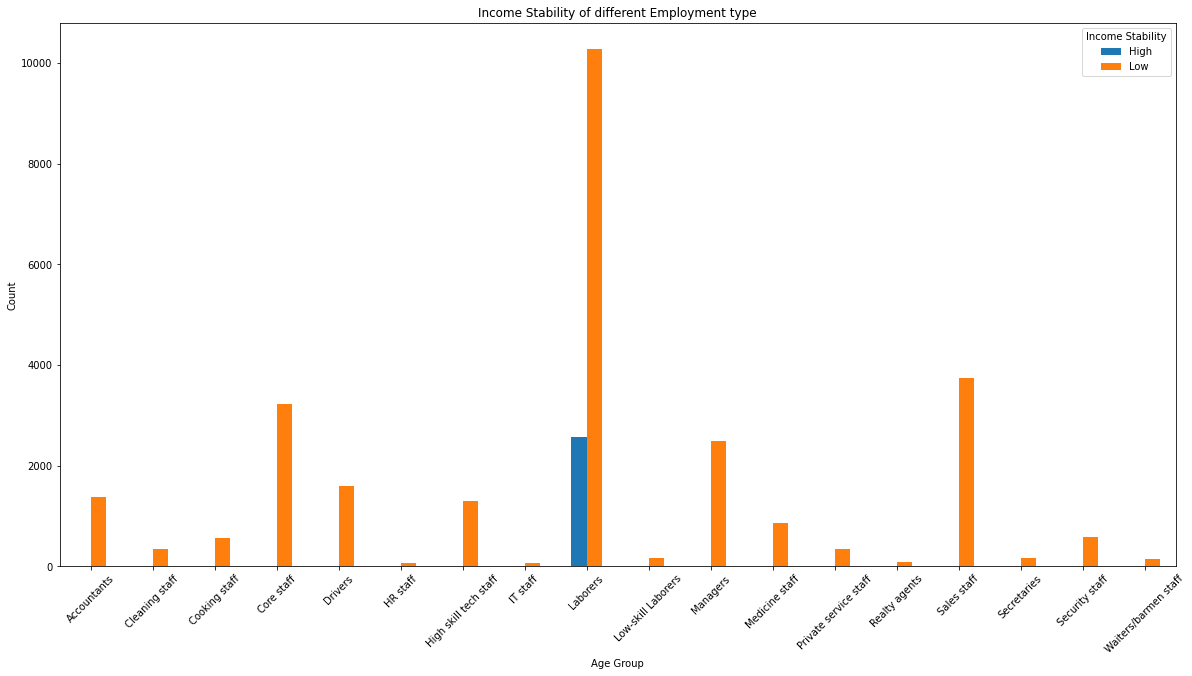

In [23]:
ax = train_copy.groupby('Type of Employment')['Income Stability'].value_counts().unstack()
ax.plot(kind = 'bar', figsize = (20,10))
plt.xticks(rotation =45)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Income Stability of different Employment type')
plt.show()

### Credit Score of all Profession

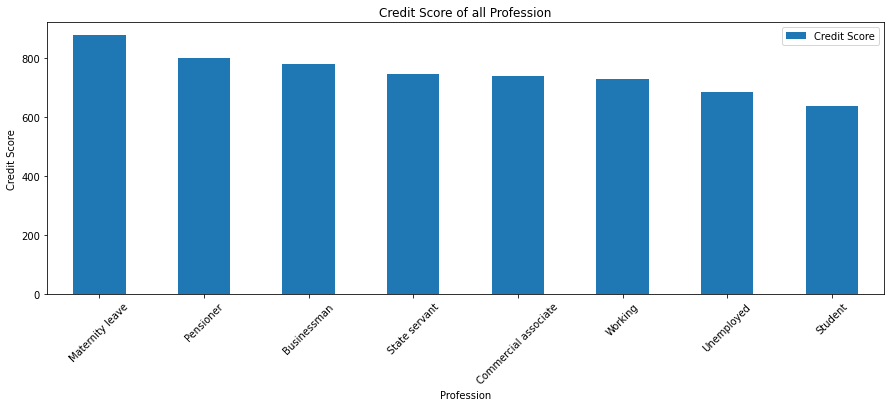

In [24]:
ax = round(train_copy.groupby(['Profession'])[['Credit Score']].mean().sort_values('Credit Score',ascending = False), 2)
ax.plot(kind = 'bar', figsize = (15,5))
plt.xticks(rotation =45)
plt.ylabel('Credit Score')
plt.title('Credit Score of all Profession') 
plt.show()

### Credit Score of different Employment type

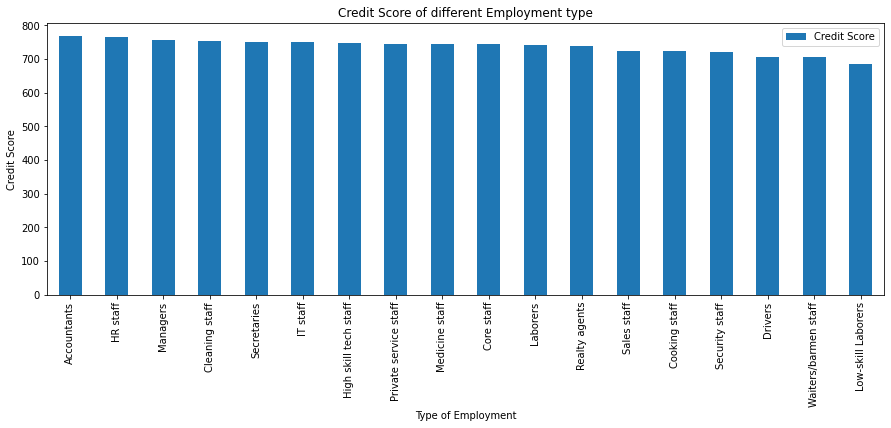

In [25]:
ax = round(train_copy.groupby(['Type of Employment'])[['Credit Score']].mean().sort_values('Credit Score',ascending = False), 2)
ax.plot(kind = 'bar', figsize = (15,5))
plt.xticks(rotation =90)
plt.ylabel('Credit Score')
plt.title('Credit Score of different Employment type') 
plt.show()

### Credit Score of Age group

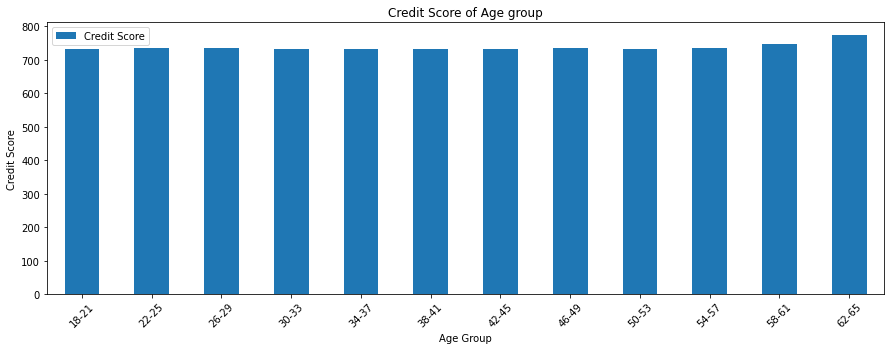

In [26]:
ax = round(train_copy.groupby(['Age Group'])[['Credit Score']].mean().sort_index(), 2)
ax.plot(kind = 'bar', figsize = (15,5))
plt.xticks(rotation =45)
plt.ylabel('Credit Score')
plt.title('Credit Score of Age group')
plt.show()

### Type of Employment according to Age Group

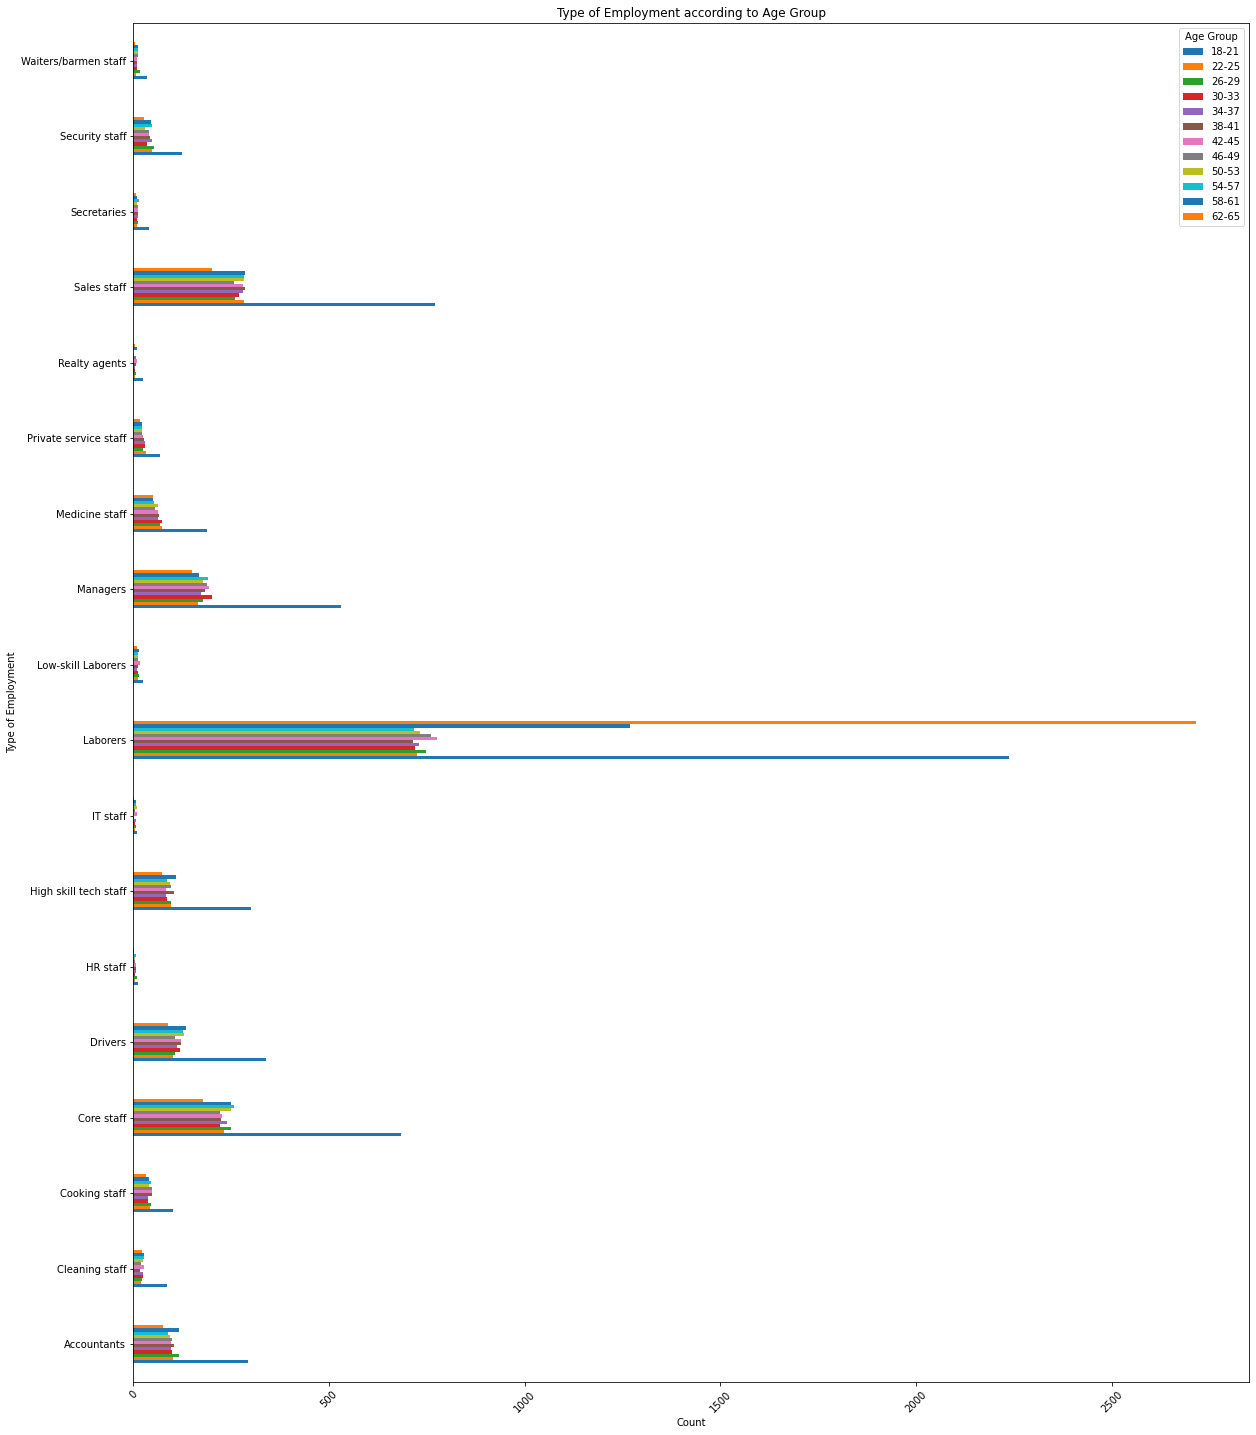

In [27]:
ax = train_copy.groupby('Type of Employment')['Age Group'].value_counts().unstack()
ax.plot(kind = 'barh', figsize = (20,25))
plt.xticks(rotation =45)
plt.ylabel('Type of Employment')
plt.xlabel('Count')
plt.title('Type of Employment according to Age Group')
plt.show()

### Current Loan Expenses of Employment type

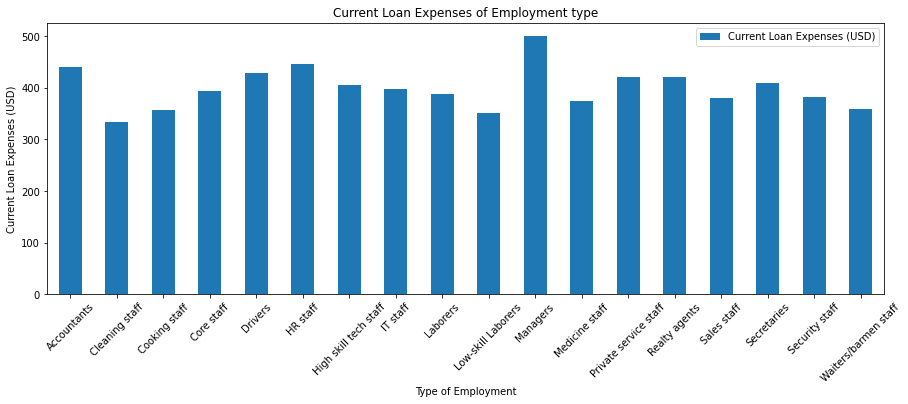

In [28]:
ax = round(train_copy.groupby(['Type of Employment'])[['Current Loan Expenses (USD)']].mean().sort_index(), 2)
ax.plot(kind = 'bar', figsize = (15,5))
plt.xticks(rotation =45)
plt.ylabel('Current Loan Expenses (USD)')
plt.title('Current Loan Expenses of Employment type')
plt.show()

### Loan Amount request of employment types

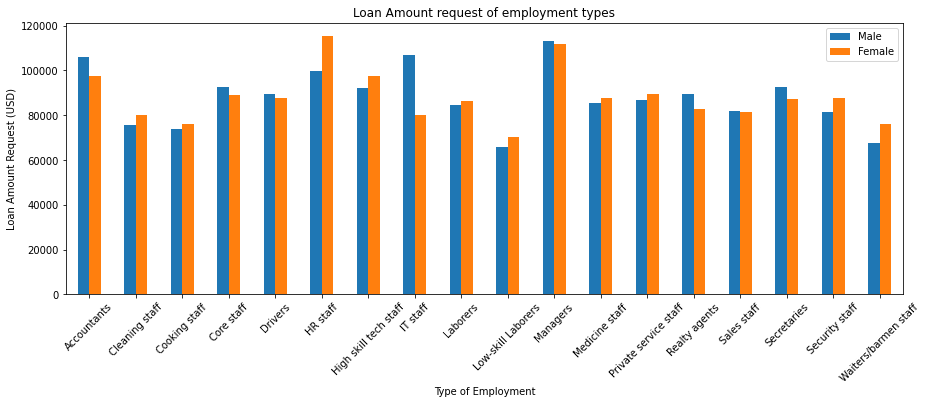

In [29]:
ax = round(train_copy.groupby(['Type of Employment','Gender'])[['Loan Amount Request (USD)']].mean().unstack(), 2)
ax.plot(kind = 'bar', figsize = (15,5))
plt.xticks(rotation =45)
plt.ylabel('Loan Amount Request (USD)')
plt.title('Loan Amount request of employment types')
plt.legend(labels = ['Male', 'Female'])
plt.show()

### Loan Amount request according to Age group

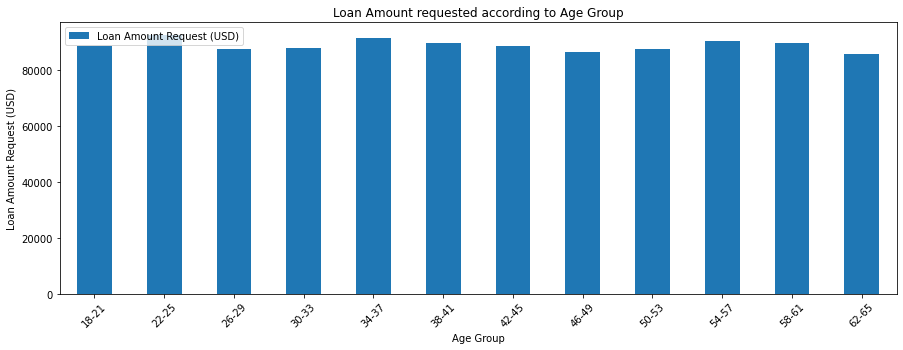

In [30]:
ax = round(train_copy.groupby(['Age Group'])[['Loan Amount Request (USD)']].mean().sort_index(), 2)
ax.plot(kind = 'bar', figsize = (15,5))
plt.xticks(rotation =45)
plt.ylabel('Loan Amount Request (USD)')
plt.title('Loan Amount requested according to Age Group')
plt.show()

### Type of Employment according to Profession

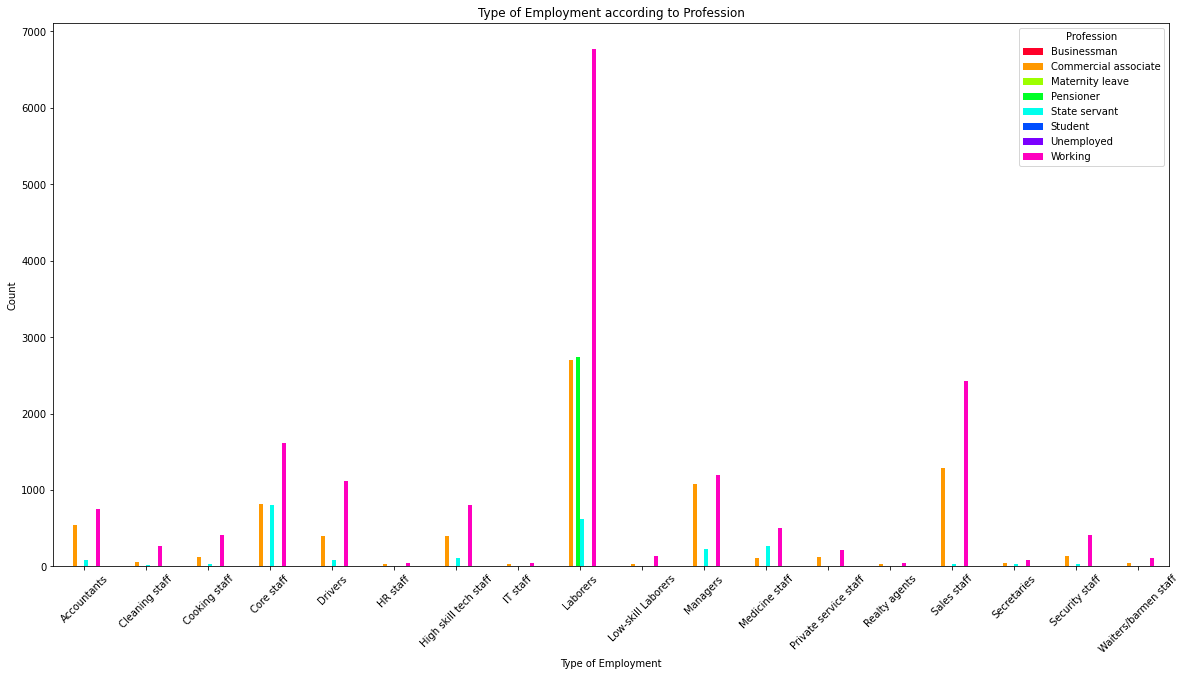

In [31]:
ax = train_copy.groupby('Type of Employment')['Profession'].value_counts().unstack()
ax.plot(kind = 'bar', figsize = (20,10), colormap = 'gist_rainbow')
plt.xticks(rotation =45)
plt.xlabel('Type of Employment')
plt.ylabel('Count')
plt.title('Type of Employment according to Profession')
plt.show()

### Expenses Types of applicants

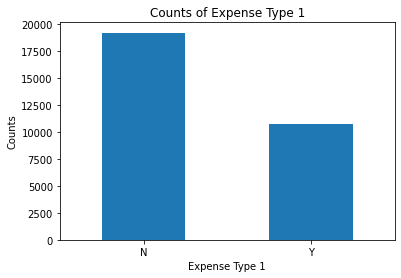

In [32]:
df_exp_1 = train_copy['Expense Type 1'].value_counts()
df_exp_1.plot(kind = 'bar',
             xlabel = 'Expense Type 1', ylabel ='Counts',
             title = 'Counts of Expense Type 1')
plt.xticks(rotation = 0)
plt.show()

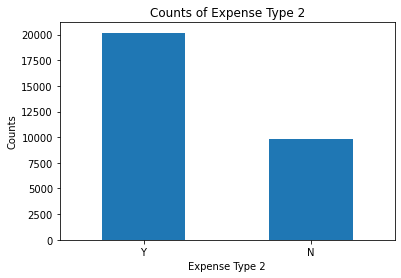

In [33]:
df_exp_2 = train_copy['Expense Type 2'].value_counts()
df_exp_2.plot(kind = 'bar',
             xlabel = 'Expense Type 2', ylabel ='Counts',
             title = 'Counts of Expense Type 2')
plt.xticks(rotation = 0)
plt.show()

### Type 1 Expense of various Employment Type

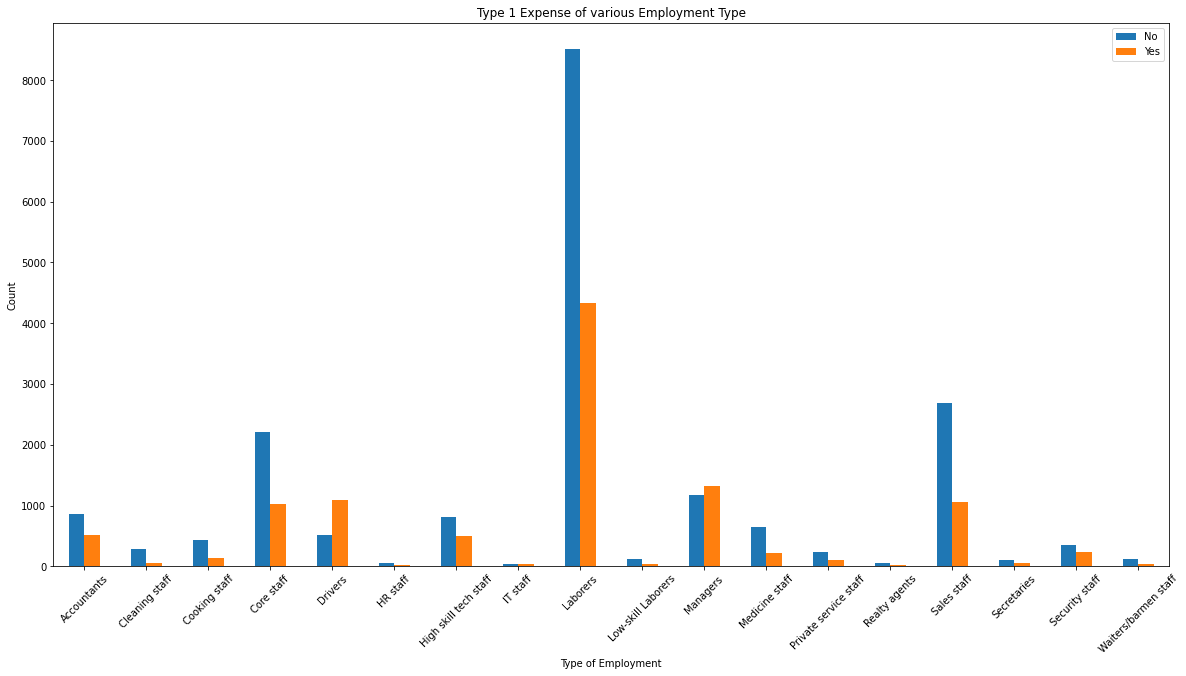

In [34]:
ax = train_copy.groupby('Type of Employment')['Expense Type 1'].value_counts().unstack()
ax.plot(kind = 'bar', figsize = (20,10))
plt.xticks(rotation =45)
plt.xlabel('Type of Employment')
plt.ylabel('Count')
plt.title('Type 1 Expense of various Employment Type')
plt.legend(labels =['No', 'Yes'])
plt.show()

### Type 1 Expense of various Employment Type

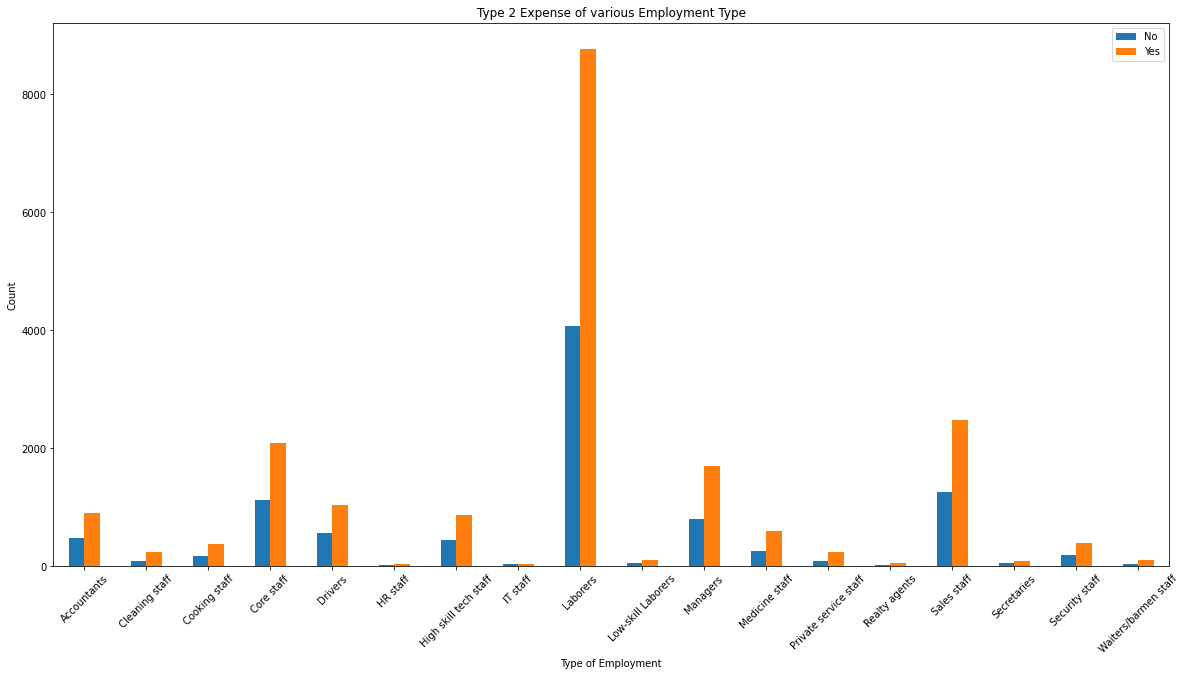

In [35]:
ax = train_copy.groupby('Type of Employment')['Expense Type 2'].value_counts().unstack()
ax.plot(kind = 'bar', figsize = (20,10))
plt.xticks(rotation =45)
plt.xlabel('Type of Employment')
plt.ylabel('Count')
plt.title('Type 2 Expense of various Employment Type')
plt.legend(labels =['No', 'Yes'])
plt.show()

### Location of Employment Type

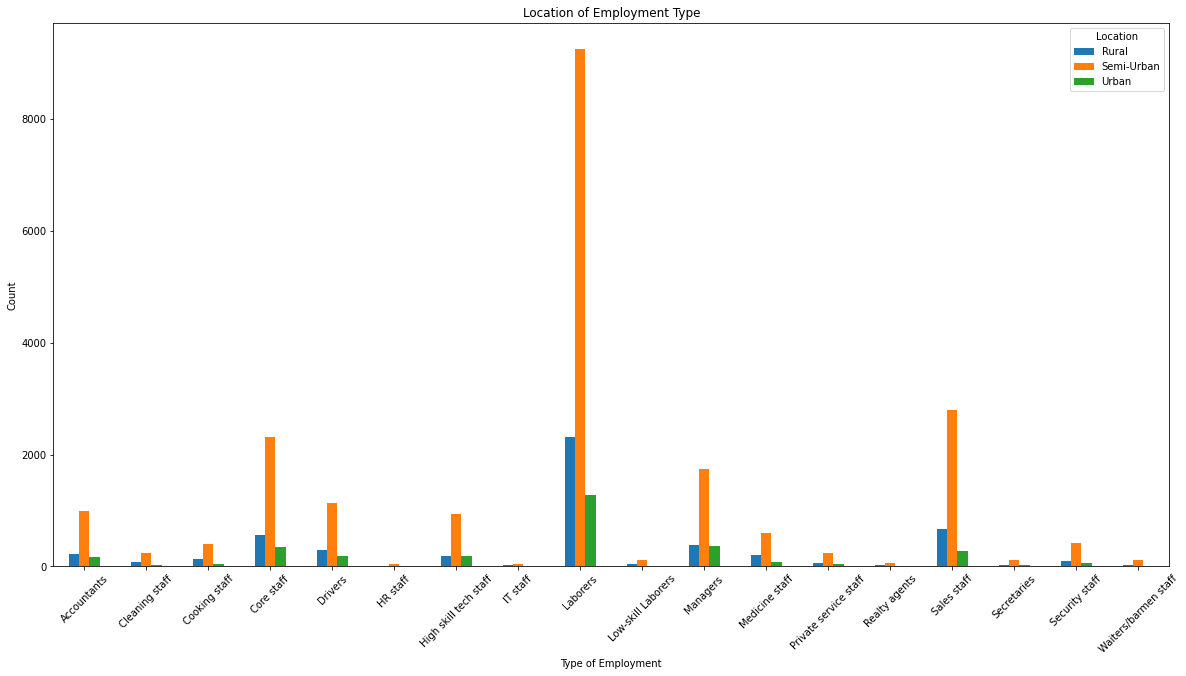

In [36]:
ax = train_copy.groupby('Type of Employment')['Location'].value_counts().unstack()
ax.plot(kind = 'bar', figsize = (20,10))
plt.xticks(rotation =45)
plt.xlabel('Type of Employment')
plt.ylabel('Count')
plt.title('Location of Employment Type')
plt.show()

### Property Location of Employment Type

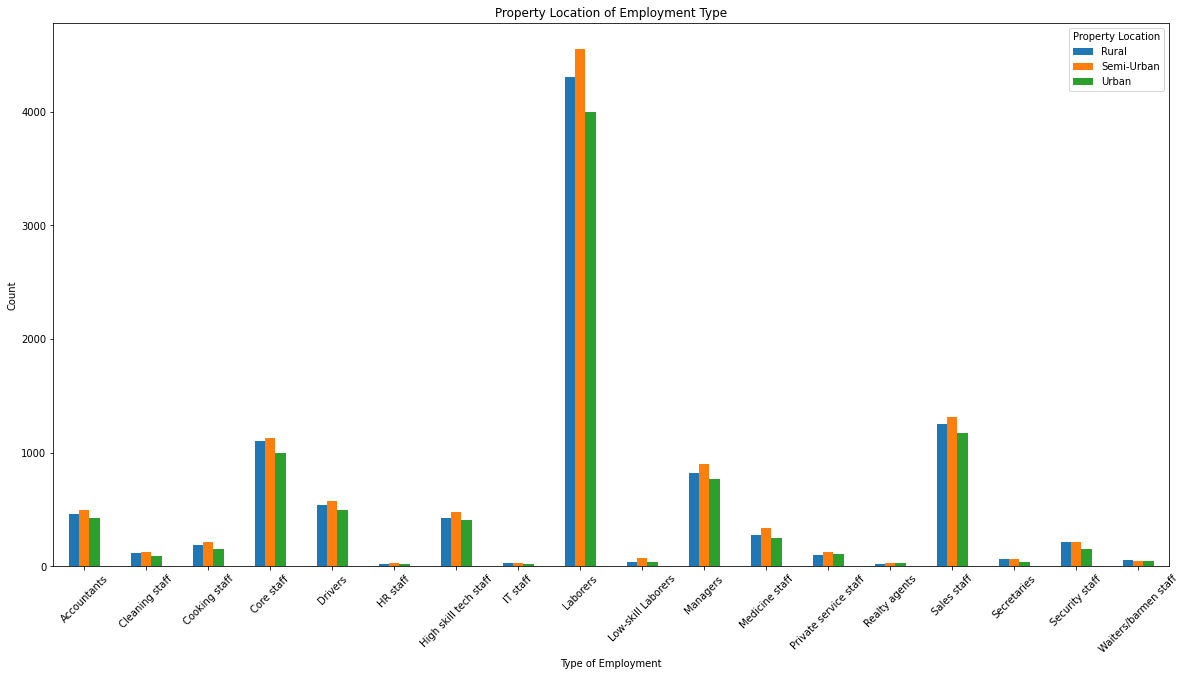

In [37]:
ax = train_copy.groupby('Type of Employment')['Property Location'].value_counts().unstack()
ax.plot(kind = 'bar', figsize = (20,10))
plt.xticks(rotation =45)
plt.xlabel('Type of Employment')
plt.ylabel('Count')
plt.title('Property Location of Employment Type')
plt.show()

### Credit card status of Employment type

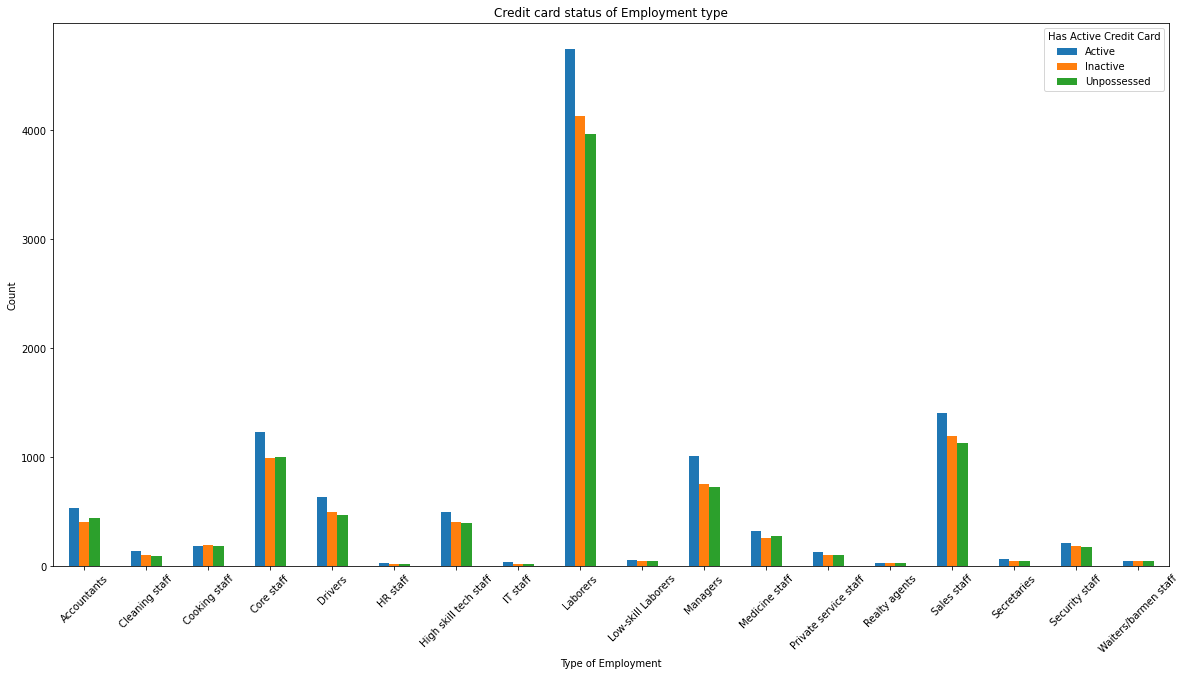

In [38]:
ax = train_copy.groupby('Type of Employment')['Has Active Credit Card'].value_counts().unstack()
ax.plot(kind = 'bar', figsize = (20,10))
plt.xticks(rotation =45)
plt.xlabel('Type of Employment')
plt.ylabel('Count')
plt.title('Credit card status of Employment type')
plt.show()

## Data Wrangling

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [40]:
le = LabelEncoder()
train_copy['Expense Type 1'] = le.fit_transform(train_copy['Expense Type 1'])
train_copy['Expense Type 2'] = le.fit_transform(train_copy['Expense Type 2'])
train_copy['Age Group'] = le.fit_transform(train_copy['Age Group'])

In [41]:
# Dummies for Profession column
df_prof = pd.get_dummies(train_copy['Profession'])
train_copy = pd.merge(train_copy, df_prof, on=train_copy.index)
train_copy.drop('key_0',axis=1,inplace=True)

# Dummies for Gender column
df_gender = pd.get_dummies(train_copy['Gender'])
train_copy = pd.merge(train_copy, df_gender, on=train_copy.index)
train_copy.drop('key_0',axis=1,inplace=True)

# Dummies for Income Stability column
df_stability = pd.get_dummies(train_copy['Income Stability'])
train_copy = pd.merge(train_copy, df_stability, on=train_copy.index)
train_copy.drop('key_0',axis=1,inplace=True)

# Dummies for Type of Employment column
df_employment = pd.get_dummies(train_copy['Type of Employment'])
train_copy = pd.merge(train_copy, df_employment, on=train_copy.index)
train_copy.drop('key_0',axis=1,inplace=True)

# Dummies for Locatiom column
df_location = pd.get_dummies(train_copy['Location'])
train_copy = pd.merge(train_copy, df_location, on=train_copy.index)
train_copy.drop('key_0',axis=1,inplace=True)

# Dummies for Has Active Credit Card column
df_active_card = pd.get_dummies(train_copy['Has Active Credit Card'])
train_copy = pd.merge(train_copy, df_active_card, on=train_copy.index)
train_copy.drop('key_0',axis=1,inplace=True)

# Dummies for Property Location column
df_prop_loc = pd.get_dummies(train_copy['Property Location'])
train_copy = pd.merge(train_copy, df_prop_loc, on=train_copy.index)
train_copy.drop('key_0',axis=1,inplace=True)

In [42]:
X = train_copy.drop(['Loan Sanction Amount (USD)', 'Customer ID', 'Name', 'Gender','Age', 'Income Stability', 'Profession', 'Type of Employment',
                    'Location', 'Has Active Credit Card', 'Property Location'], axis = 1)
y = train_copy['Loan Sanction Amount (USD)']

# split the data into (70%)train and (30%)test
X_train ,X_test ,y_train, y_test = train_test_split(X , y ,test_size =0.3, random_state=42)

In [43]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))

0.5704071761592377


In [44]:
#Lasso Regression
lasso_reg = Lasso(normalize = True)
lasso_reg.fit(X_train, y_train)
y_pred =lasso_reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.5759207788932018


In [45]:
#Ridge
ridge_reg = Ridge(normalize = True, alpha = 0.01)
ridge_reg.fit(X_train, y_train)
y_pred =ridge_reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.5712944396122606


In [46]:
#Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(r2_score(y_pred_rf, y_test))

0.6589212216300366


In [47]:
#Decision Tree Regressor
dt_reg = DecisionTreeRegressor(max_depth = 7)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.7505042634772329


In [48]:
#Gradient Boosting Regressor
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

gbr_reg = GradientBoostingRegressor(**params)
gbr_reg.fit(X_train, y_train)
y_pred = gbr_reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.7540317265549498


In [49]:
# AdaBoost Regressor
adr_reg = AdaBoostRegressor(base_estimator = gbr_reg)
adr_reg.fit(X_train, y_train)
y_pred = adr_reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.6618844213079085


# Test Data

In [50]:
#Test Data
test_dir = os.path.join(data_dir, 'test.csv')
test = pd.read_csv(test_dir, na_values = '?')

In [51]:
# Check Null values
test.isnull().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                     77
Property Price                  168
dtype: int64

In [52]:
test[['Income (USD)', 'Current Loan Expenses (USD)', 
       'Credit Score', 'Property Age', 'Co-Applicant','Property Price']] = test[['Income (USD)', 'Current Loan Expenses (USD)', 
                                               'Credit Score', 'Property Age', 'Co-Applicant','Property Price']].fillna(test[['Income (USD)', 
                                            'Current Loan Expenses (USD)', 'Credit Score', 'Property Age', 'Co-Applicant', 'Property Price']].mean())

In [53]:
# Dependent column by median
test[['Dependents']] = test[['Dependents']].fillna(test[['Dependents']].median())

In [54]:
categorical_test = test[['Gender', 'Income Stability', 'Type of Employment','Has Active Credit Card', 'Property Location']]

#Imputing categorical columns by most frequent
S_imp = SimpleImputer(strategy = 'most_frequent')
final_cat = S_imp.fit_transform(categorical_test)

#Converting into dtype DataFrame
cat_col = pd.DataFrame(final_cat, columns = ['Gender', 'Income Stability', 'Type of Employment','Has Active Credit Card', 'Property Location'])

#Dropping old columns
test.drop(labels = ['Gender', 'Income Stability', 'Type of Employment','Has Active Credit Card', 'Property Location'], axis = 'columns')

#Replacing new values to train data
test[['Gender', 'Income Stability', 'Type of Employment',
        'Has Active Credit Card', 'Property Location']] = cat_col[['Gender', 'Income Stability', 'Type of Employment',
                                                                   'Has Active Credit Card', 'Property Location']]
test = round(test, 2)
test.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

In [55]:
test_copy = test.copy()

In [56]:
test_copy['Age Group'] = test_copy['Age'].map(lambda x: age_convert(x))

In [57]:
# Label Encoding
le = LabelEncoder()
test_copy['Expense Type 1'] = le.fit_transform(test_copy['Expense Type 1'])
test_copy['Expense Type 2'] = le.fit_transform(test_copy['Expense Type 2'])
test_copy['Age Group'] = le.fit_transform(test_copy['Age Group'])

In [58]:
# Dummies for Profession column
df_prof = pd.get_dummies(test_copy['Profession'])
test_copy = pd.merge(test_copy, df_prof, on=test_copy.index)
test_copy.drop('key_0',axis=1,inplace=True)

# Dummies for Gender column
df_gender = pd.get_dummies(test_copy['Gender'])
test_copy = pd.merge(test_copy, df_gender, on=test_copy.index)
test_copy.drop('key_0',axis=1,inplace=True)

# Dummies for Income Stability column
df_stability = pd.get_dummies(test_copy['Income Stability'])
test_copy = pd.merge(test_copy, df_stability, on=test_copy.index)
test_copy.drop('key_0',axis=1,inplace=True)

# Dummies for Type of Employment column
df_employment = pd.get_dummies(test_copy['Type of Employment'])
test_copy = pd.merge(test_copy, df_employment, on=test_copy.index)
test_copy.drop('key_0',axis=1,inplace=True)

# Dummies for Locatiom column
df_location = pd.get_dummies(test_copy['Location'])
test_copy = pd.merge(test_copy, df_location, on=test_copy.index)
test_copy.drop('key_0',axis=1,inplace=True)

# Dummies for Has Active Credit Card column
df_active_card = pd.get_dummies(test_copy['Has Active Credit Card'])
test_copy = pd.merge(test_copy, df_active_card, on=test_copy.index)
test_copy.drop('key_0',axis=1,inplace=True)

# Dummies for Property Location column
df_prop_loc = pd.get_dummies(test_copy['Property Location'])
test_copy = pd.merge(test_copy, df_prop_loc, on=test_copy.index)
test_copy.drop('key_0',axis=1,inplace=True)

In [59]:
id_ = test_copy['Customer ID']

In [60]:
#Drop columns
test_copy = test_copy.drop(['Customer ID', 'Name', 'Gender','Age', 'Income Stability', 'Profession', 'Type of Employment',
                    'Location', 'Has Active Credit Card', 'Property Location'], axis = 1)

In [61]:
# Created new variable as Businessman from Profession column as it was missing in test data
test_copy['Businessman'] = 0

In [62]:
# Predict on the test data
y_pred_adc = gbr_reg.predict(test_copy)

print(y_pred_adc)

# Create a sample submission file
sample_submission = pd.DataFrame({'Customer ID':id_,'Loan Sanction Amount (USD)':y_pred_adc})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sub_adc3.csv',index=False)

[85323.80398415 65214.68733658 67306.74151441 ...  -584.25280086
 72815.39629417 57160.3651702 ]
